<a href="https://colab.research.google.com/github/SageSquash/MTechImageEnhancement/blob/master/Copy_of_GAAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

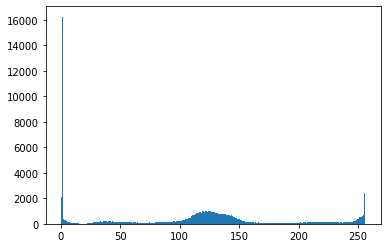

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# Open the image
img = Image.open('/content/Y13.jpg')


# Convert the image to a numpy array
img_array = np.array(img)
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

# Flatten the image array
flattened = img_array.flatten()

# Create a histogram of the image
plt.hist(flattened, bins=256, range=(0,256))
plt.show()


In [ ]:
import numpy as np
from PIL import Image

# # Load the image
# img = Image.open('image.jpg')

# Convert the image to a numpy array
img_array = np.array(img)

# Calculate the mean and median of the intensity values
mean = np.mean(img_array)
median = np.median(img_array)

# Calculate the clipping threshold
clipping_threshold = (mean + median) / 2

# Apply the clipping threshold to the image
img_array[img_array < clipping_threshold] = 0

# Save the clipped image
clipped_img = Image.fromarray(img_array)
img_clipped = clipped_img
clipped_img.save('clipped_image.jpg')

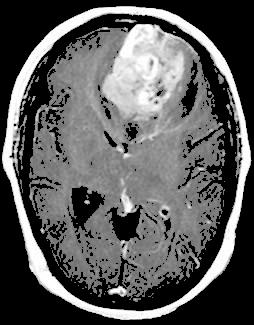

In [ ]:
clipped_img

In [ ]:
# # Calculate the mean of the image intensity values
# mean = np.mean(flattened)

# # Calculate the median of the image intensity values
# median = np.median(flattened)

# # Calculate the clipping threshold by taking the average of the mean and median
# clipping_threshold = (mean + median) / 2

# print(clipping_threshold)

In [ ]:
# # Apply the clipping threshold to the image
# img_clipped = np.clip(img_array, 0, clipping_threshold)

# # Save the clipped image
# img_clipped = Image.fromarray(np.uint8(img_clipped))
# # print(img_clipped.size)
# img_clipped.save("clipped_image.jpg")

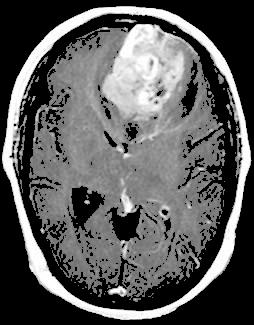

In [ ]:
img_clipped

In [ ]:
# Read the image
# img = cv2.imread('image.jpg',0)

# Find the maximum gray level
max_gray_level = np.max(img_clipped)
L = max_gray_level

# Print the maximum gray level
print(L)



255


In [ ]:
from PIL import Image
import numpy as np

def calculate_exposure(image_path,L):
    # Load the image
    img = Image.open(image_path)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Flatten the image array
    flatten_img = img_array.flatten()
    # Maximum gray level
    L = 256
    # Calculate the histogram of the image
    hist, bins = np.histogram(flatten_img, bins=L, range=(0, L))
    # Calculate the exposure value
    exposure = 1/L * ((np.sum(hist*bins[:-1])) / (np.sum(hist)))
    return exposure


In [ ]:
# Test the function
image_path = '/content/clipped_image.jpg'
exposure = calculate_exposure(image_path,L)
print("Exposure:", exposure)

Exposure: 0.3557002858116293


In [ ]:
# img_array = np.array(img_clipped)

# # Flatten the image array
# flattened = img_array.flatten()

# mean_gray_level = sum(flattened[k]*k for k in range(L)) / sum(flattened[k] for k in range(L))
# normalized_mean_gray_level = mean_gray_level / L
# Exposure = normalized_mean_gray_level
# print(normalized_mean_gray_level)

In [ ]:
Et = L * (1 - exposure)
Et

164.2964271180345

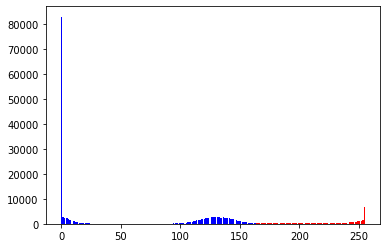

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = Image.open("/content/clipped_image.jpg")
# Convert the image to a numpy array
img_array = np.array(img)

# Get the histogram of the image
hist, bins = np.histogram(img_array, bins=256, range=(0, 256))

# Set the exposure threshold (Et) value
Et = int(Et)

# Divide the histogram into two sub-histograms
low_exposure_hist = hist[:Et]
high_exposure_hist = hist[Et:]

# Plot the histograms
plt.bar(bins[:Et], low_exposure_hist, color='blue')
plt.bar(bins[Et:256], high_exposure_hist, color='red')
plt.show()


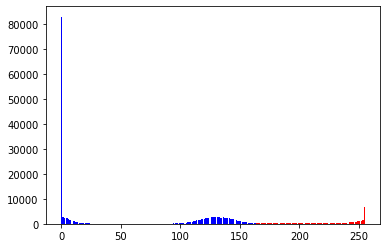

In [ ]:
import numpy as np
from PIL import Image

# Open the image
img = Image.open('/content/clipped_image.jpg')
# Convert the image to a numpy array
img_array = np.array(img)

# Get the histogram of the image
hist, bins = np.histogram(img_array, bins=256, range=(0, 256))

# Set the exposure threshold (Et) value
Et = int(Et)

# Divide the histogram into two sub-histograms
low_exposure_hist = hist[:Et]
high_exposure_hist = hist[Et:]

# Plot the histograms
plt.bar(bins[:Et], low_exposure_hist, color='blue')
plt.bar(bins[Et:256], high_exposure_hist, color='red')
plt.show()

# Create the low exposure sub-image
low_exposure_img = np.zeros(img_array.shape, dtype=np.uint8)
low_exposure_img[img_array < Et] = img_array[img_array < Et]

# Create the high exposure sub-image
high_exposure_img = np.zeros(img_array.shape, dtype=np.uint8)
high_exposure_img[img_array >= Et] = img_array[img_array >= Et]

# Save the images
Image.fromarray(low_exposure_img).save("/content/image_low.jpg")
Image.fromarray(high_exposure_img).save("/content/image_high.jpg")


In [ ]:
# # Calculate the threshold using Otsu's method
# threshold = Et
# im_arr = img_array

# # Create the two sub-images by thresholding the image
# im_low = np.where(im_arr < threshold, 0, 255)
# im_high = np.where(im_arr >= threshold, 0, 255)

# # Convert the sub-images back to PIL images
# im_low = Image.fromarray(im_low.astype("uint8"))
# im_high = Image.fromarray(im_high.astype("uint8"))

# # Save the sub-images
# im_low.save("/content/image_low.jpg")
# im_high.save("/content/image_high.jpg")


# img = Image.open('/content/image_high.jpg')

# # Convert the image to a numpy array
# img_array = np.array(img)

# # Flatten the image array
# flattened = img_array.ravel()

# plt.hist(img_array.ravel(),256,[0,256]); plt.show()

In [ ]:
import numpy as np
from skimage.color import rgb2gray
from skimage.exposure import histogram
import math
def calculate_entropy(image):
  # Convert the image to grayscale
  image = rgb2gray(image)

  # Calculate the histogram of the image
  hist, _ = histogram(image)

  # Normalize the histogram
  hist = hist / hist.sum()

  # Calculate the entropy of the image
  entropy = -sum(p * math.log(p) for p in hist if p != 0)
  
  return entropy

In [ ]:
# def calculate_entropy(image):
#     # Calculate the histogram of the image
#     hist, _ = np.histogram(image, bins=256, range=(0, 256))
#     # Normalize the histogram
#     hist = hist / hist.sum()
#     # Calculate the entropy of the image
#     entropy = -np.sum(p * np.log2(p) for p in hist if p != 0)
#     return entropy

In [ ]:
# from skimage import io
# from skimage.feature import greycomatrix, greycoprops
# from skimage.measure import shannon_entropy

# def calculate_texture_features(image_path, distance, angle):
#     # Read an image
#     # img = io.imread(image_path)
#     img = cv2.imread('/content/image_high.jpg', cv2.IMREAD_GRAYSCALE)

#     # Create the GLCM
#     glcm = greycomatrix(img, [distance], [angle], levels=256, normed=True, symmetric=True)

#     # Calculate the contrast of the image
#     contrast = greycoprops(glcm, 'contrast')[0][0]

#     # Calculate the energy of the image
#     energy = greycoprops(glcm, 'energy')[0][0]
    
#     # Calculate the entropy of the image
#     entropy = shannon_entropy(image_path)

#     return contrast, energy, entropy

In [ ]:
from skimage import io
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

def calculate_texture_features(image_path, distance, angle):
    # Read an image
    # img = io.imread(image_path)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create the GLCM
    glcm = greycomatrix(img, [distance], [angle], levels=256, normed=True, symmetric=True)

    # Calculate the contrast of the image
    contrast = greycoprops(glcm, 'contrast')[0][0]

    # Calculate the energy of the image
    energy = greycoprops(glcm, 'energy')[0][0]
    
    # Calculate the entropy of the image
    entropy = calculate_entropy(img)

    return contrast, energy, entropy

In [ ]:
image_path = '/content/image_high.jpg'
distance = 1
angle = 0
contrast, energy, entropy = calculate_texture_features(image_path, distance, angle)
print("Contrast:", contrast)
print("Energy:", energy)
print("Entropy:", entropy)
# Calculate cf1
cf1 = np.log((contrast * np.exp(entropy)) / energy)
print("cf1:", cf1)

Contrast: 1188.4583764062013
Energy: 0.6521829224292844
Entropy: 1.816892867308375
cf1: 9.324735332070892


<ipython-input-491-2c85a181c7f2>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(image)


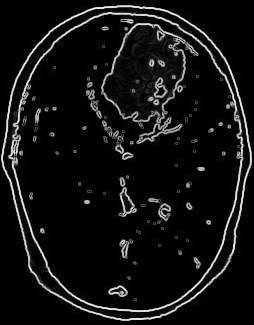

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image
img = cv2.imread('/content/image_high.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Sobel edge detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel = cv2.magnitude(sobelx, sobely)

# Normalize the image
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the image
cv2_imshow(sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Read an image
img = cv2.imread('/content/image_high.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Sobel edge detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel = cv2.magnitude(sobelx, sobely)

# Normalize the image
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# Get the shape of the image
height, width = sobel.shape

# Print the shape of the image
print("Shape of the image:", height, "x", width)

# Threshold the image
_, sobel = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calculate the sum of the intensity of edge pixels
E_sobel = np.sum(sobel)

# Calculate the number of edge pixels
n_edges = np.count_nonzero(sobel)

print("E(Sobel):", E_sobel)
print("n(edges):", n_edges)
# Calculate cf2
cf2 = np.log(np.log(E_sobel)) * ((n_edges)/(height*width))
print("cf2:", cf2)

Shape of the image: 325 x 254
E(Sobel): 1691415
n(edges): 6633
cf2: 0.21398579224819395


In [ ]:
import numpy as np

# Read original and reconstructed images
original = cv2.imread('/content/clipped_image.jpg', cv2.IMREAD_GRAYSCALE)
reconstructed = cv2.imread('/content/image_high.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate MSE
mse = np.mean((original - reconstructed) ** 2)

# Calculate PSNR
psnr = 10 * np.log10(255**2 / mse)
cf3 = psnr

print("PSNR:", psnr)

PSNR: 31.891731940504812


In [ ]:
cf = 0.33 * cf1 + 0.33 * cf2 + 0.33 * cf3
cf

13.672049511391887

In [ ]:
from PIL import Image

# Open the image
img = Image.open('/content/image_high.jpg')

# Get the shape of the image
width, height = img.size
print("Width:", width)
print("Height:", height)

Width: 254
Height: 325


In [ ]:
# FOR HIGH IMAGE

img = '/content/image_high.jpg'

#############CF1 CALCULATION##############

distance = 1
angle = 0
contrast, energy, entropy = calculate_texture_features(img, distance, angle)
cf1 = np.log((contrast * np.exp(entropy)) / energy)

#######CF2 CALCULATION####################

img = cv2.imread('/content/image_high.jpg', cv2.IMREAD_GRAYSCALE)
# Perform Sobel edge detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel = cv2.magnitude(sobelx, sobely)

# Normalize the image
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# Get the shape of the image
height, width = sobel.shape

# Print the shape of the image
# print("Shape of the image:", height, "x", width)

# Threshold the image
_, sobel = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calculate the sum of the intensity of edge pixels
E_sobel = np.sum(sobel)

# Calculate the number of edge pixels
n_edges = np.count_nonzero(sobel)

# print("E(Sobel):", E_sobel)
# print("n(edges):", n_edges)
# Calculate cf2
cf2 = np.log(np.log(E_sobel)) * ((n_edges)/(height*width))
# print("cf2:", cf2)


############CF3 CALCULATION##################

original = cv2.imread('/content/clipped_image.jpg', cv2.IMREAD_GRAYSCALE)
# reconstructed = cv2.imread('/content/image_high.jpg', cv2.IMREAD_GRAYSCALE)
reconstructed = img

# Calculate MSE
mse = np.mean((original - reconstructed) ** 2)

# Calculate PSNR
psnr = 10 * np.log10(255**2 / mse)
cf3 = psnr

# Overall CF CALCULATION
cf = 0.33 * cf1 + 0.33 * cf2 + 0.33 * cf3

Etu = cf

# Calculate the threshold using Otsu's method
threshold = cf
img_array = np.array(img)
im_arr = img_array

# Create the two sub-images by thresholding the image
im_high1 = np.where(im_arr < threshold, 0, 255)
im_high2 = np.where(im_arr >= threshold, 0, 255)

# Convert the sub-images back to PIL images
im_high1 = Image.fromarray(im_high1.astype("uint8"))
im_high2 = Image.fromarray(im_high2.astype("uint8"))

# Save the sub-images
im_high1.save("/content/image_high1.jpg")
im_high2.save("/content/image_high2.jpg")


<ipython-input-491-2c85a181c7f2>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(image)


In [ ]:
# FOR LOW IMAGE

img = '/content/image_low.jpg'

#############CF1 CALCULATION##############

distance = 1
angle = 0
contrast, energy, entropy = calculate_texture_features(img, distance, angle)
cf1 = np.log((contrast * np.exp(entropy)) / energy)

#######CF2 CALCULATION####################

img = cv2.imread('/content/image_low.jpg', cv2.IMREAD_GRAYSCALE)
# Perform Sobel edge detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel = cv2.magnitude(sobelx, sobely)

# Normalize the image
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# Get the shape of the image
height, width = sobel.shape

# Print the shape of the image
# print("Shape of the image:", height, "x", width)

# Threshold the image
_, sobel = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calculate the sum of the intensity of edge pixels
E_sobel = np.sum(sobel)

# Calculate the number of edge pixels
n_edges = np.count_nonzero(sobel)

# print("E(Sobel):", E_sobel)
# print("n(edges):", n_edges)
# Calculate cf2
cf2 = np.log(np.log(E_sobel)) * ((n_edges)/(height*width))
# print("cf2:", cf2)


############CF3 CALCULATION##################

original = cv2.imread('/content/clipped_image.jpg', cv2.IMREAD_GRAYSCALE)
# reconstructed = cv2.imread('/content/image_high.jpg', cv2.IMREAD_GRAYSCALE)
reconstructed = img

# Calculate MSE
mse = np.mean((original - reconstructed) ** 2)

# Calculate PSNR
psnr = 10 * np.log10(255**2 / mse)
cf3 = psnr

# Overall CF CALCULATION
cf = 0.33 * cf1 + 0.33 * cf2 + 0.33 * cf3


Etl = cf
# Calculate the threshold using Otsu's method
threshold = cf
img_array = np.array(img)
im_arr = img_array

# Create the two sub-images by thresholding the image
im_low1 = np.where(im_arr < threshold, 0, 255)
im_low2 = np.where(im_arr >= threshold, 0, 255)

# Convert the sub-images back to PIL images
im_low1 = Image.fromarray(im_low1.astype("uint8"))
im_low2 = Image.fromarray(im_low2.astype("uint8"))

# Save the sub-images
im_low1.save("/content/image_low1.jpg")
im_low2.save("/content/image_low2.jpg")

<ipython-input-491-2c85a181c7f2>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(image)


In [ ]:
Et

164

In [ ]:
Etl

15.192280819565124

In [ ]:
Etu

13.672049511391887

In [ ]:
###############################PDF#########################

In [ ]:
import numpy as np
import cv2

def calculate_pdf(image, intensity_range):
    # Create a histogram of the image with the specified range
    hist = cv2.calcHist([image], [0], None, [256], intensity_range)

    # Normalize the histogram
    pdf = hist / float(np.sum(hist))
    return pdf

In [ ]:
# Load the low exposure sub-image
img = cv2.imread('/content/image_low1.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the PDF of the image within the range (50, 150)
Pl1 = calculate_pdf(img, [0,Etl])

In [ ]:
# Load the low exposure sub-image
img = cv2.imread('/content/image_low2.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the PDF of the image within the range (50, 150)
Pl1 = calculate_pdf(img, [Etl+1,Et])

In [ ]:
# Load the low exposure sub-image
img = cv2.imread('/content/image_high1.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the PDF of the image within the range (50, 150)
Pu1 = calculate_pdf(img, [0,Etu])

In [ ]:
# Load the low exposure sub-image
img = cv2.imread('/content/image_high2.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the PDF of the image within the range (50, 150)
Pu1 = calculate_pdf(img, [Etu,255])

In [ ]:
# Pl1m = (Pl1) / (Σ(k=Etl+1 to Et) Pl1(k) + Pl1)

In [ ]:
import numpy as np
import cv2

def calculate_normalized_pdf1(image, Etl, intensity_range):
    # Create a histogram of the sub-image with the specified range
    Etl = int(Etl)
    hist, _ = np.histogram(image, bins=256, range=intensity_range)
    # Normalize the histogram to get the PDF of the sub-image
    pdf = hist / float(np.sum(hist))
    # Calculate the sum of the probabilities of finding pixels with intensity levels between 0 and Etl in the sub-image
    sum_prob = np.sum(pdf[:Etl+1])
    # Normalize the PDF by dividing the original PDF by the sum of the probabilities
    normalized_pdf = pdf / (sum_prob + pdf)
    return normalized_pdf

In [ ]:
# Load the low exposure sub-image
img = cv2.imread('/content/image_low1.jpg', cv2.IMREAD_GRAYSCALE)
1
# Calculate the normalized PDF of the low exposure sub-image with intensity range (0,256)
Pl1m = calculate_normalized_pdf1(img, Etl, [0,256])

In [ ]:
def calculate_normalized_pdf(image, Etl, Et, intensity_range):
    Etl = int(Etl)
    Et = int(Et)
    # Create a histogram of the sub-image with the specified range
    hist, _ = np.histogram(image, bins=256, range=intensity_range)
    # Normalize the histogram to get the PDF of the sub-image
    pdf = hist / float(np.sum(hist))
    # Calculate the sum of the probabilities of finding pixels with intensity levels between Etl+1 and Et in the sub-image
    sum_prob = np.sum(pdf[Etl+1:Et])
    # Normalize the PDF by dividing the original PDF by the sum of the probabilities
    normalized_pdf = pdf / (sum_prob + pdf)
    return normalized_pdf

In [ ]:
img = cv2.imread('/content/image_low2.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the normalized PDF of the low exposure sub-image with intensity range (0,256)
Pl2m = calculate_normalized_pdf(img, Etl,Et, [0,256])

In [ ]:
import numpy as np
import cv2
def calculate_normalized_pdf2(image, Etl, Et, intensity_range):
    Etl = int(Etl)
    Et = int(Et)
    # Create a histogram of the sub-image with the specified range
    hist, _ = np.histogram(image, bins=256, range=intensity_range)
    # Normalize the histogram to get the PDF of the sub-image
    pdf = hist / float(np.sum(hist))
    # Calculate the sum of the probabilities of finding pixels with intensity levels between Etl+1 and Et in the sub-image
    sum_prob = np.sum(pdf[Etl+1:Et])
    # Normalize the PDF by dividing the original PDF by the sum of the probabilities
    normalized_pdf = pdf / (sum_prob + pdf + 1e-8)
    return normalized_pdf

In [ ]:
# Load the low exposure sub-image
img = cv2.imread('/content/image_high1.jpg', cv2.IMREAD_GRAYSCALE)
1
# Calculate the normalized PDF of the low exposure sub-image with intensity range (0,256)
temp = Et+Etu
Pu1m  = calculate_normalized_pdf2(img, Et,temp, [0,256])

In [ ]:
def calculate_normalized_pdf3(image, Etu, intensity_range):
    Etu = int(Etu)
    # Create a histogram of the sub-image with the specified range
    hist, _ = np.histogram(image, bins=256, range=intensity_range)
    # Normalize the histogram to get the PDF of the sub-image
    pdf = hist / float(np.sum(hist))
    # Calculate the sum of the probabilities of finding pixels with intensity levels between Etl+1 and Et in the sub-image
    sum_prob = np.sum(pdf[Etu+1:L])
    # Normalize the PDF by dividing the original PDF by the sum of the probabilities
    normalized_pdf = pdf / (sum_prob + pdf)
    return normalized_pdf

In [ ]:
img = cv2.imread('/content/image_high2.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the normalized PDF of the low exposure sub-image with intensity range (0,256)
Pu2m = calculate_normalized_pdf3(img, Etu, [0,256])

In [ ]:
############################CDF######################

In [ ]:
import numpy as np

def calculate_cdf_from_pdf(pdf):
    # Calculate the CDF of the sub-image
    cdf = np.cumsum(pdf)
    return cdf

In [ ]:
# # Load the sub-image pdf
# pdf = calculate_normalized_pdf(img, Etl, Et, [0,256])

# Calculate the CDF of the sub-image
cl1 = calculate_cdf_from_pdf(Pl1m)
cl2 = calculate_cdf_from_pdf(Pl2m)
cu1 = calculate_cdf_from_pdf(Pu1m)
cu2 = calculate_cdf_from_pdf(Pu2m)

In [ ]:
##########################Calculate tranfer function###################

In [ ]:
Tl1 = (Etl) * cl1

In [ ]:
Tl2 = (Etl + 1) + (Et - (Etl + 1)) * cl2

In [ ]:
Tu1 = (Et + 1) + ((Et+Etu) - (Et + 1)) * cu1

In [ ]:
Tu2 = (Etu + 1) + (L - (Etu + 1)) * cu2

In [ ]:
def combine_equalized_images(sub_image1, sub_image2, sub_image3, sub_image4, T1, T2, T3, T4, Etl, Et, Etu):
    # Apply the transfer functions to the sub-images
    sub_image1 = T1[sub_image1]
    sub_image2 = T2[sub_image2]
    sub_image3 = T3[sub_image3]
    sub_image4 = T4[sub_image4]
    # Combine the equalized sub-images
    enhanced_image = np.zeros(sub_image1.shape, dtype=np.uint8)
    enhanced_image[(sub_image1 >= 0) & (sub_image1 <= Etl)] = sub_image1[(sub_image1 >= 0) & (sub_image1 <= Etl)]
    enhanced_image[(sub_image2 > Etl) & (sub_image2 <= Et)] = sub_image2[(sub_image2 > Etl) & (sub_image2 <= Et)]
    enhanced_image[(sub_image3 > Et) & (sub_image3 <= Etu)] = sub_image3[(sub_image3 > Et) & (sub_image3 <= int(Et+Etu))]
    enhanced_image[(sub_image4 > Etu) & (sub_image4 <= 255)] = sub_image4[(sub_image4 > Etu) & (sub_image4 <= 255)]
    return enhanced_image


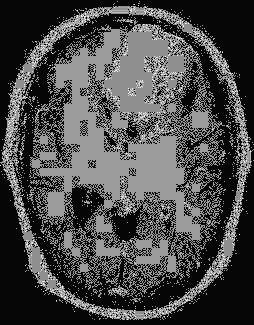

In [ ]:
# Load the sub-images
sub_image1 = cv2.imread('/content/image_low1.jpg', cv2.IMREAD_GRAYSCALE)
sub_image2 = cv2.imread('/content/image_low2.jpg', cv2.IMREAD_GRAYSCALE)
sub_image3 = cv2.imread('/content/image_high1.jpg', cv2.IMREAD_GRAYSCALE)
sub_image4 = cv2.imread('/content/image_high2.jpg', cv2.IMREAD_GRAYSCALE)

# # Calculate the transfer functions for the sub-images
# T1, T2, T3, T4 = calculate_transfer_functions(sub_image1, sub_image2, sub_image3, sub_image4)

# Combine the equalized sub-images
enhanced_image = combine_equalized_images(sub_image1, sub_image2, sub_image3, sub_image4, Tl1, Tl2, Tu1, Tu2, Etl, Et, Etu)

# Show the enhanced image
cv2_imshow(enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


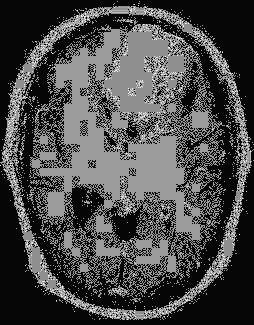

In [ ]:
# Load the sub-images
sub_image1 = cv2.imread('/content/image_low1.jpg', cv2.IMREAD_GRAYSCALE)
sub_image2 = cv2.imread('/content/image_low2.jpg', cv2.IMREAD_GRAYSCALE)
sub_image3 = cv2.imread('/content/image_high1.jpg', cv2.IMREAD_GRAYSCALE)
sub_image4 = cv2.imread('/content/image_high2.jpg', cv2.IMREAD_GRAYSCALE)

# # Calculate the transfer functions for the sub-images
# T1, T2, T3, T4 = calculate_transfer_functions(sub_image1, sub_image2, sub_image3, sub_image4)

# Combine the equalized sub-images
enhanced_image = combine_equalized_images(sub_image1, sub_image2, sub_image3, sub_image4, Tl1, Tl2, Tu1, Tu2, Etl, Et, Etu)

# Show the enhanced image
cv2_imshow(enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()